<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/IR290LandTallposfixedrhofixedA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOM= 11.82  %


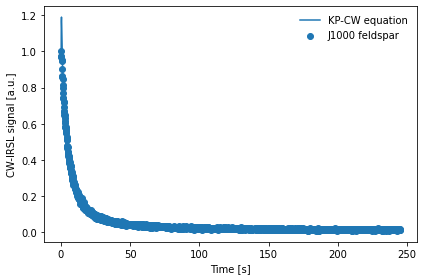

FOM= 13.9  %


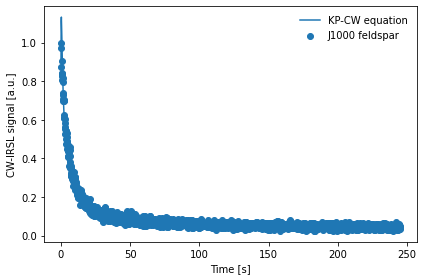

FOM= 12.34  %


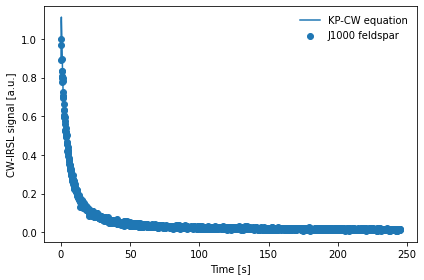

FOM= 14.7  %


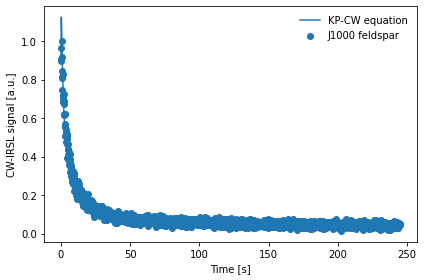

FOM= 10.62  %


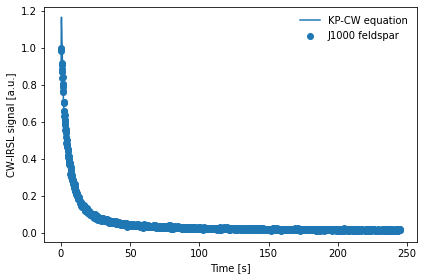

FOM= 14.07  %


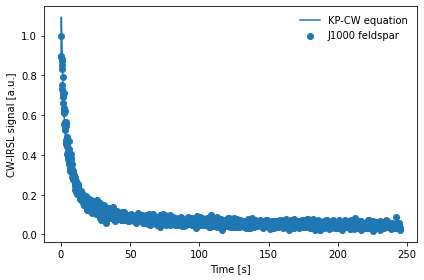

FOM= 10.08  %


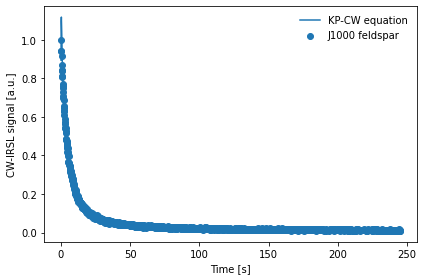

FOM= 13.73  %


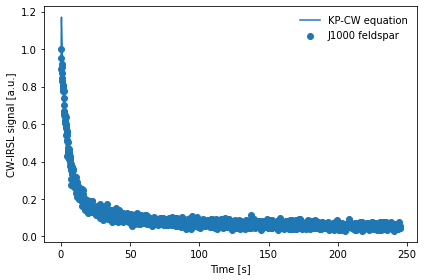

FOM= 9.97  %


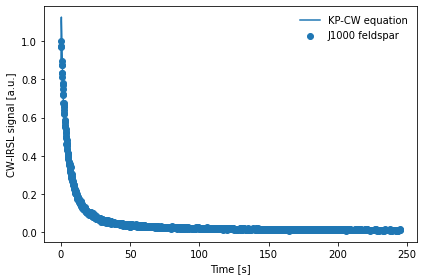

FOM= 13.16  %


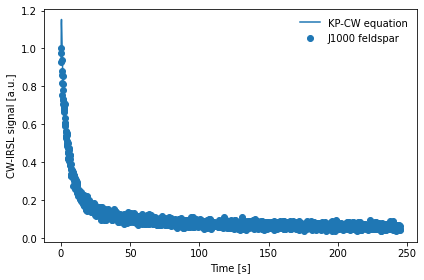

FOM= 32.02  %


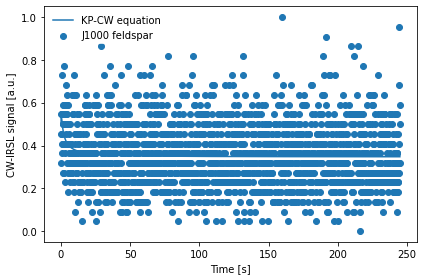

FOM= 17.58  %


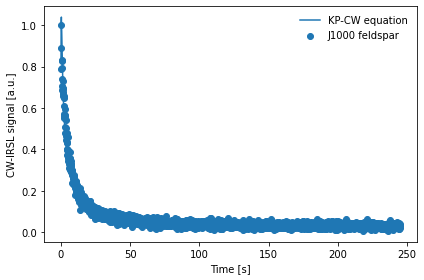

FOM= 12.0  %


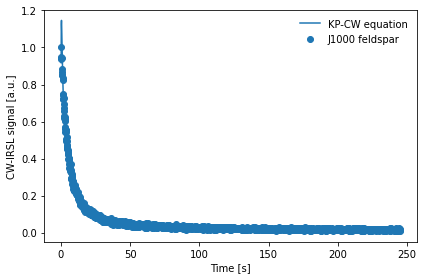

FOM= 15.69  %


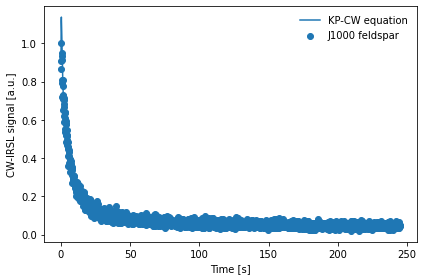

FOM= 16.66  %


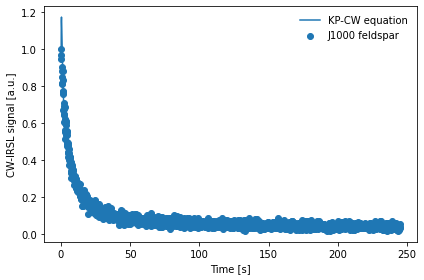

FOM= 19.83  %


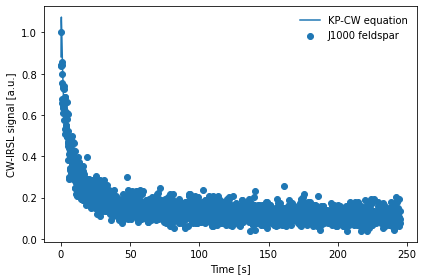

FOM= 17.47  %


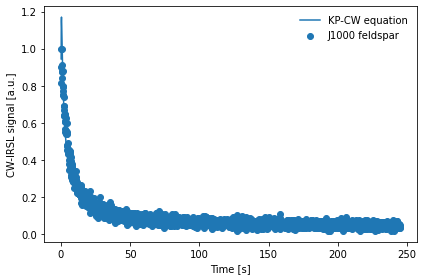

FOM= 20.2  %


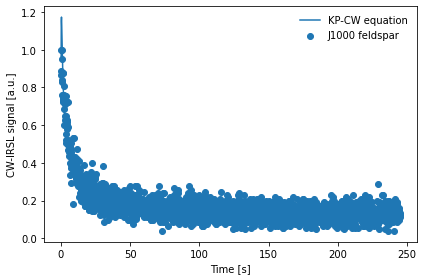

FOM= 15.97  %


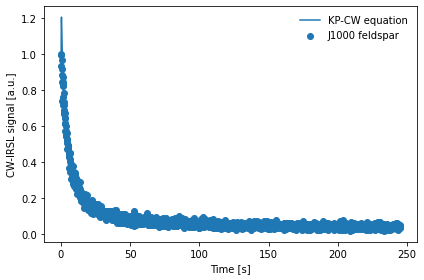

FOM= 20.12  %


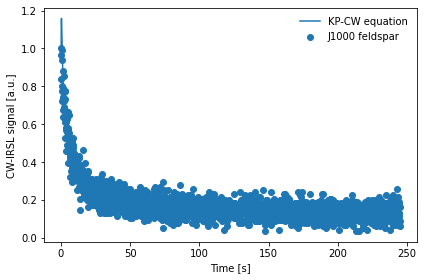

FOM= 15.11  %


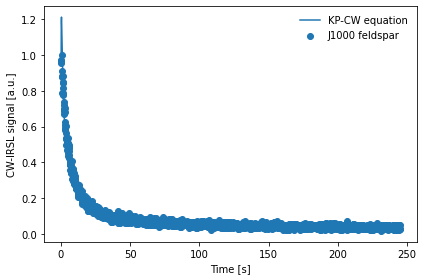

FOM= 20.12  %


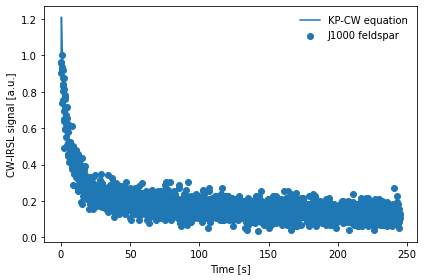

FOM= 14.91  %


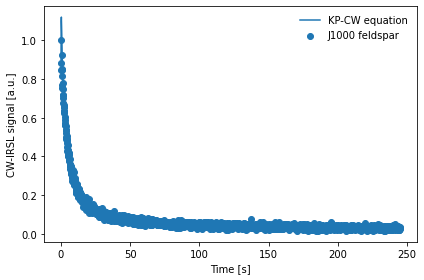

FOM= 19.19  %


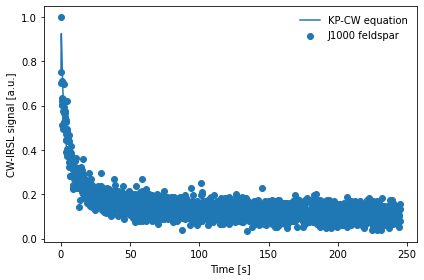

FOM= 32.87  %


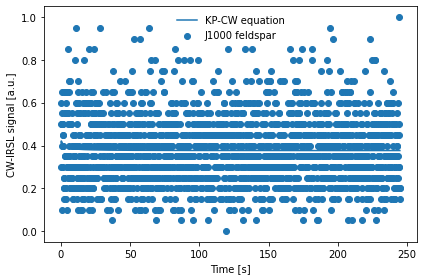

FOM= 23.3  %


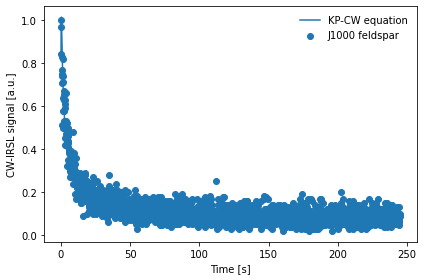

FOM= 18.41  %


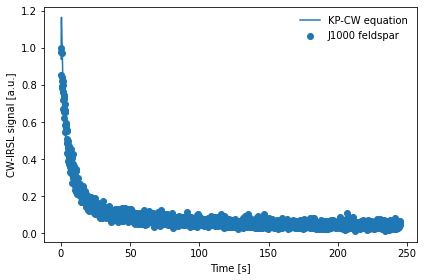

FOM= 20.51  %


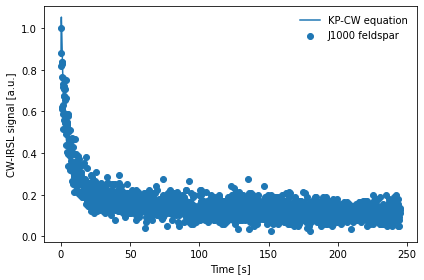

FOM= 17.13  %


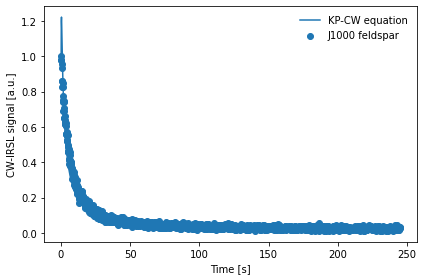

FOM= 19.28  %


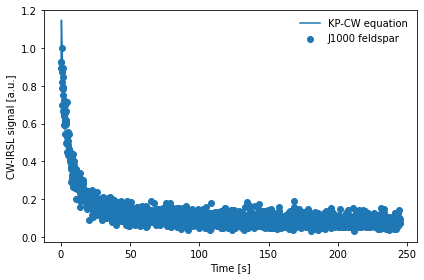

FOM= 18.67  %


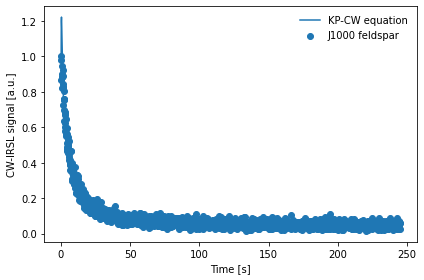

FOM= 22.28  %


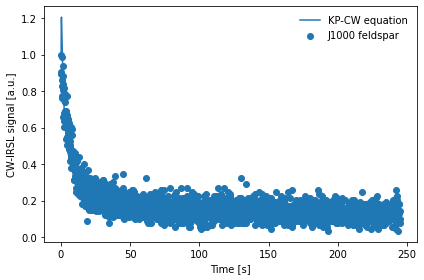

FOM= 17.05  %


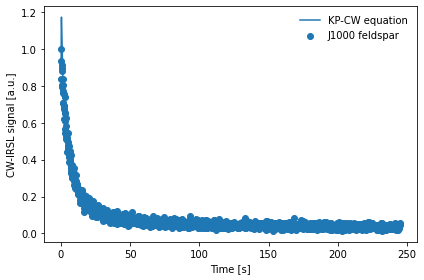

FOM= 19.63  %


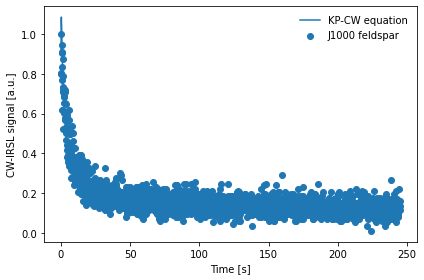

FOM= 14.41  %


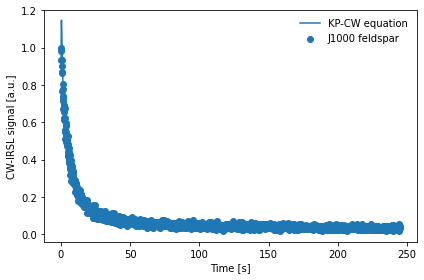

FOM= 18.7  %


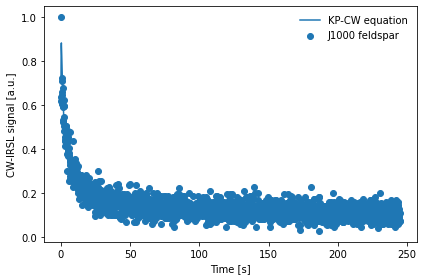

FOM= 13.79  %


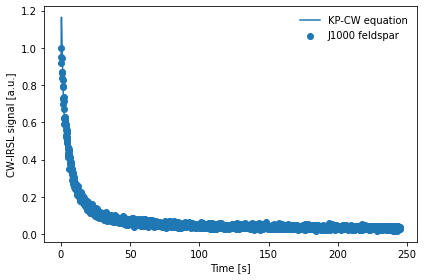

FOM= 17.21  %


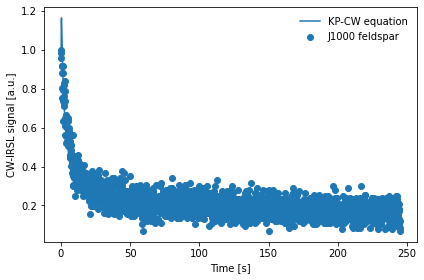

FOM= 35.63  %


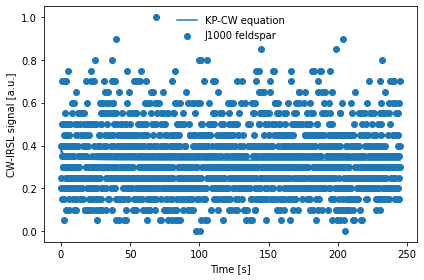

FOM= 21.79  %


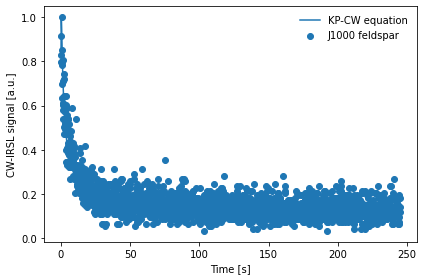

FOM= 17.42  %


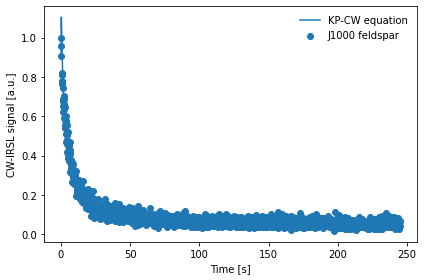

FOM= 19.68  %


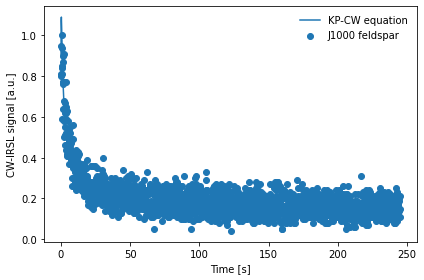

FOM= 12.84  %


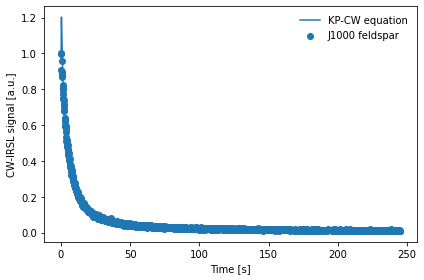

FOM= 15.74  %


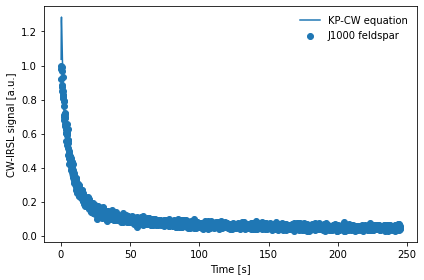

FOM= 15.25  %


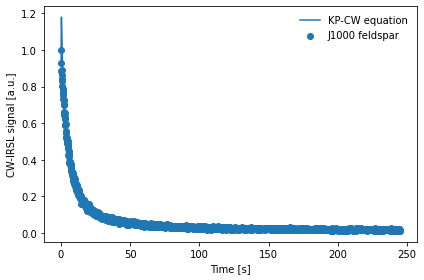

FOM= 16.06  %


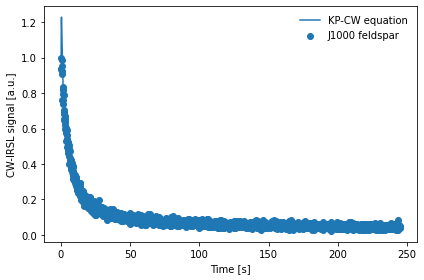

FOM= 13.99  %


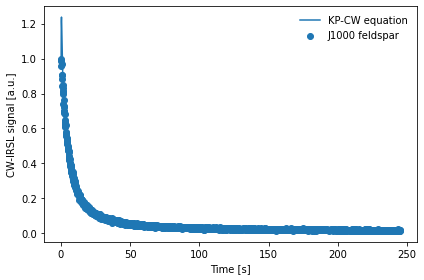

FOM= 15.04  %


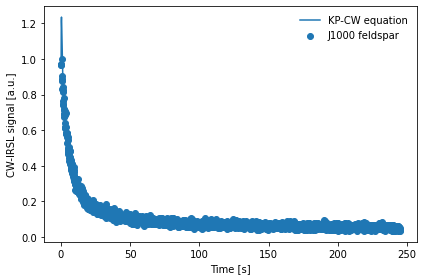

FOM= 12.43  %


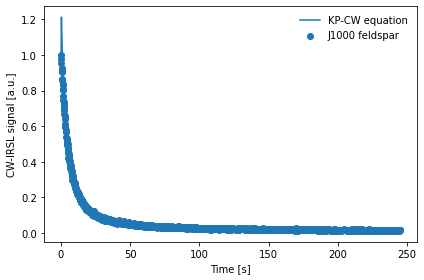

FOM= 14.43  %


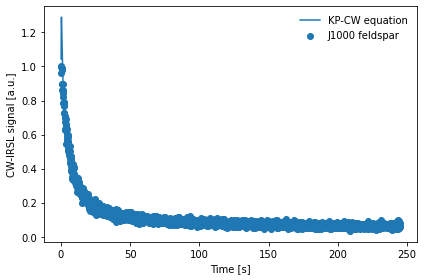

FOM= 11.46  %


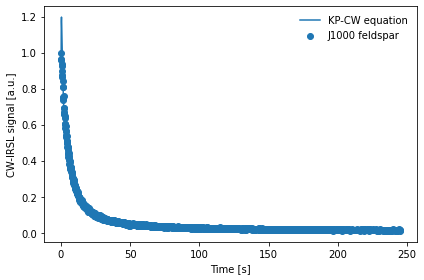

FOM= 14.11  %


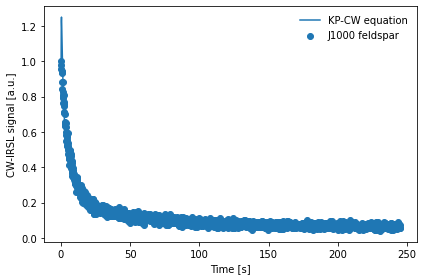

FOM= 30.42  %


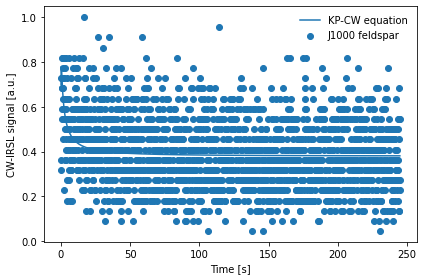

FOM= 18.02  %


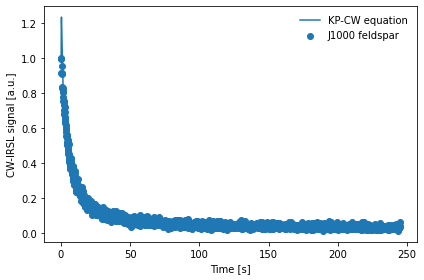

FOM= 14.34  %


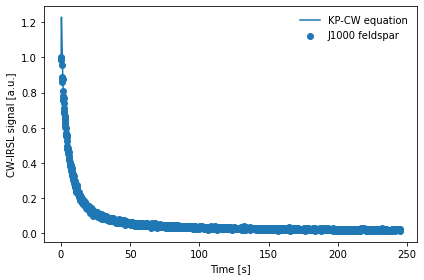

FOM= 15.98  %


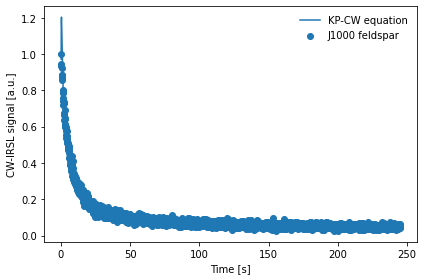

FOM= 23.7  %


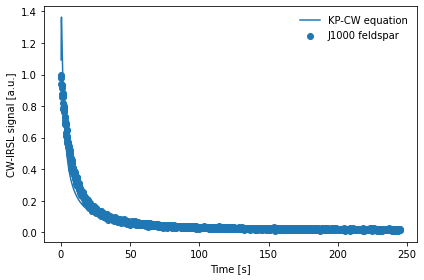

FOM= 20.98  %


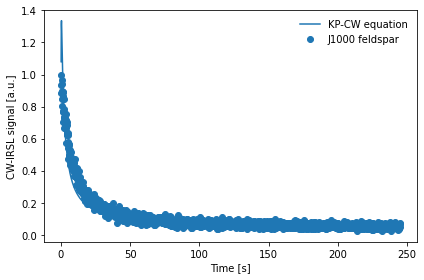

FOM= 22.21  %


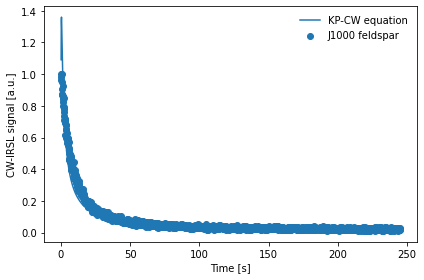

FOM= 21.95  %


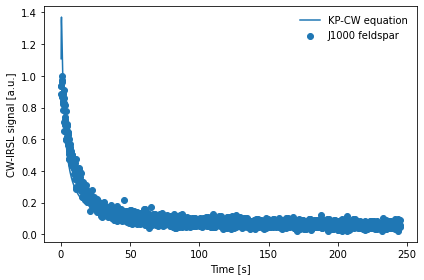

FOM= 21.79  %


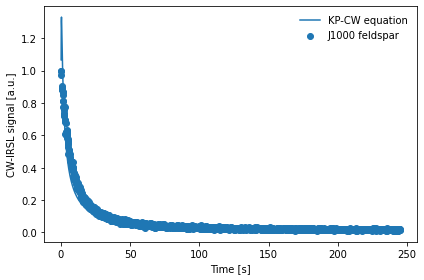

FOM= 20.15  %


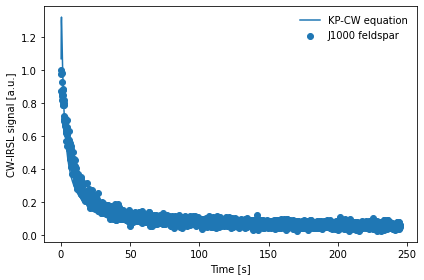

FOM= 21.07  %


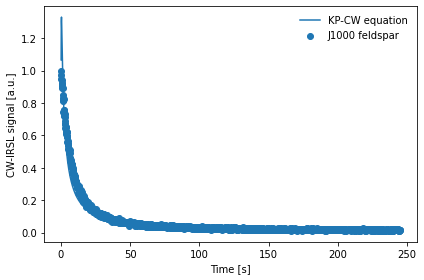

FOM= 19.92  %


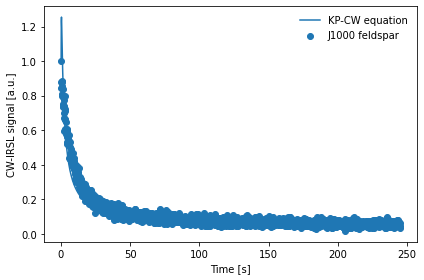

FOM= 20.65  %


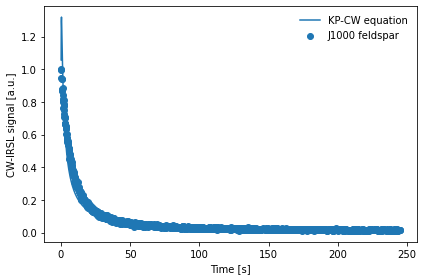

FOM= 19.89  %


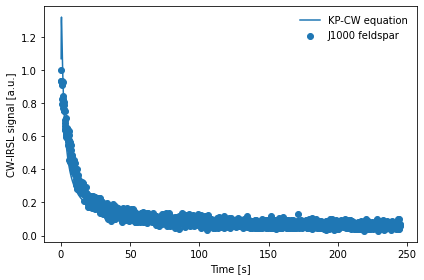

FOM= 31.85  %


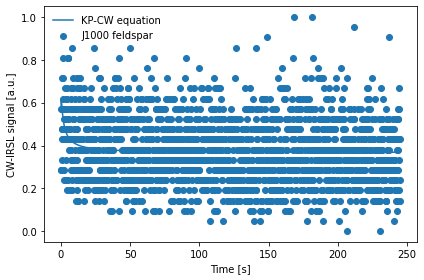

FOM= 23.52  %


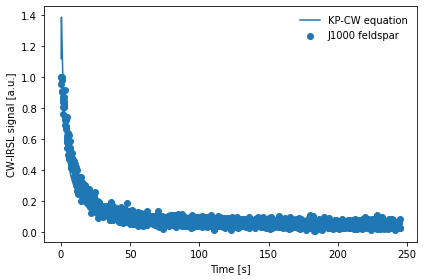

FOM= 21.24  %


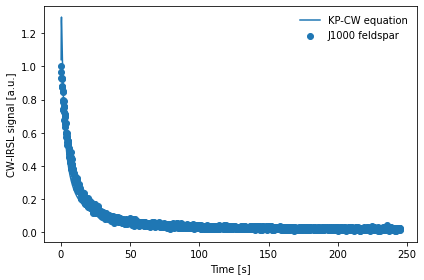

FOM= 20.58  %


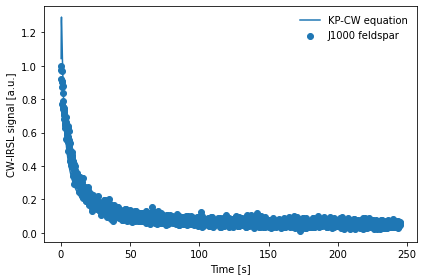

FOM= 12.49  %


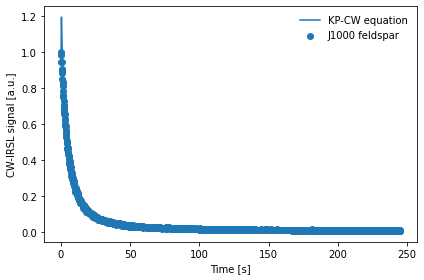

FOM= 14.22  %


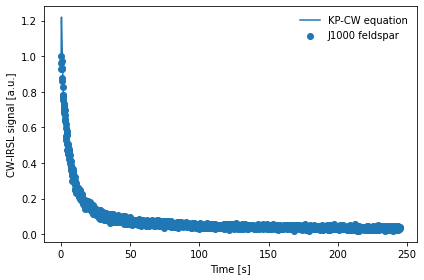

FOM= 13.3  %


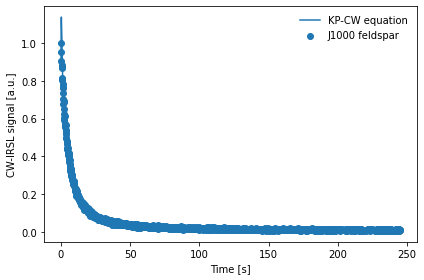

FOM= 16.05  %


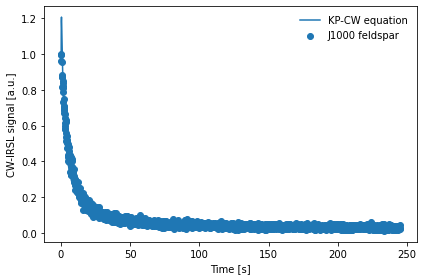

FOM= 12.26  %


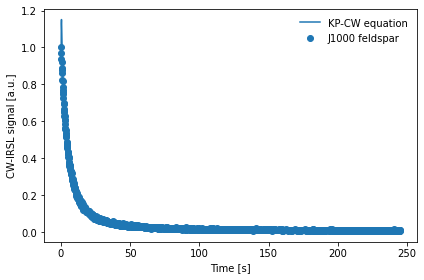

FOM= 15.28  %


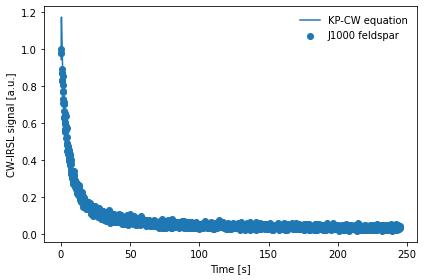

FOM= 12.01  %


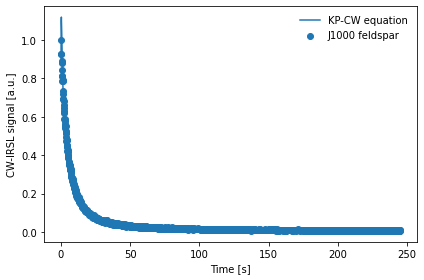

FOM= 14.81  %


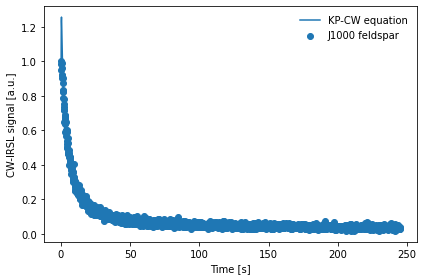

FOM= 11.91  %


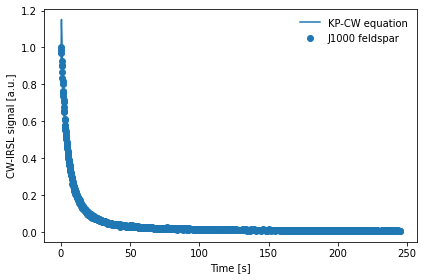

FOM= 14.46  %


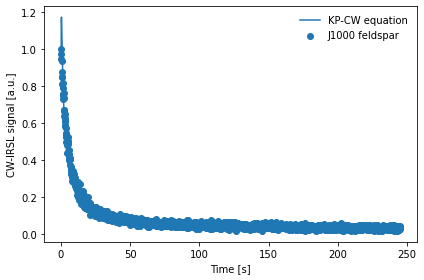

FOM= 32.89  %


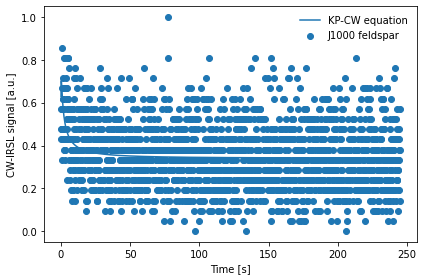

FOM= 17.99  %


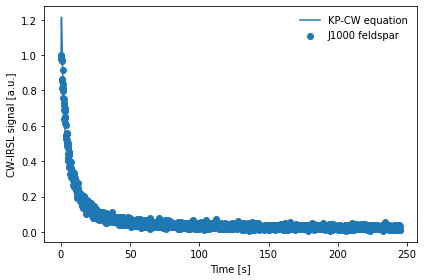

FOM= 13.34  %


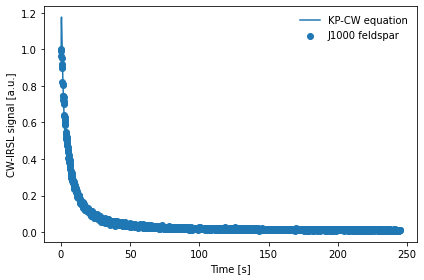

FOM= 15.79  %


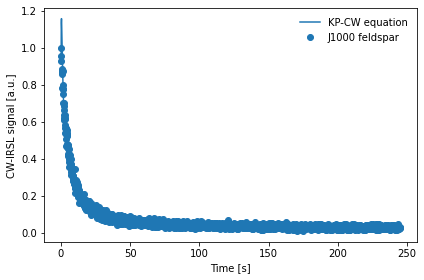

FOM= 11.12  %


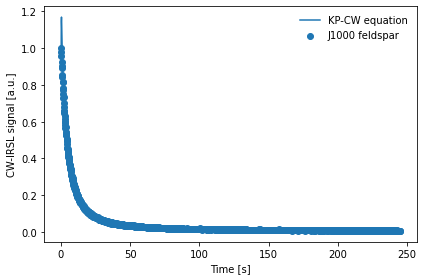

FOM= 12.61  %


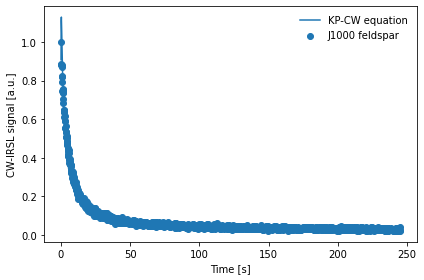

FOM= 13.08  %


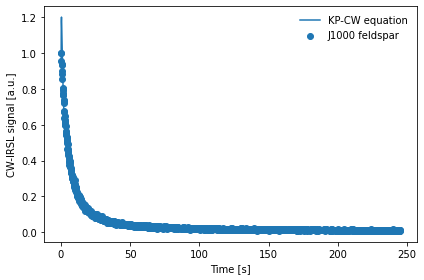

FOM= 14.35  %


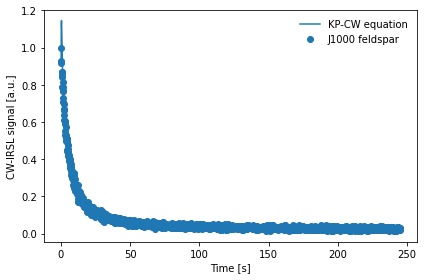

FOM= 12.42  %


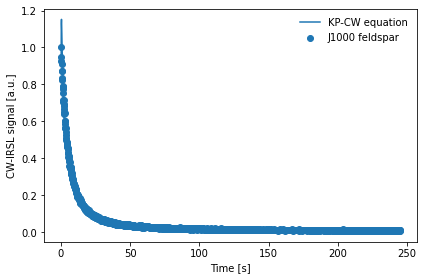

FOM= 13.68  %


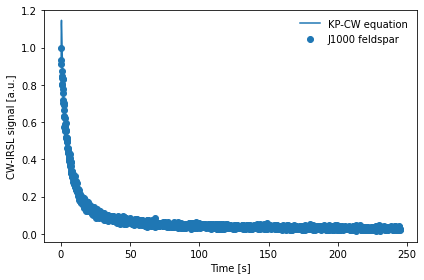

FOM= 11.74  %


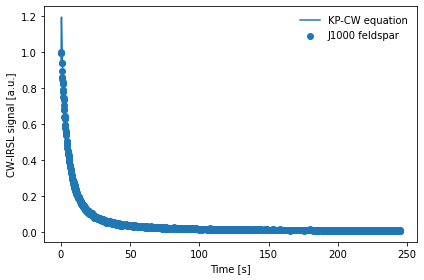

FOM= 13.51  %


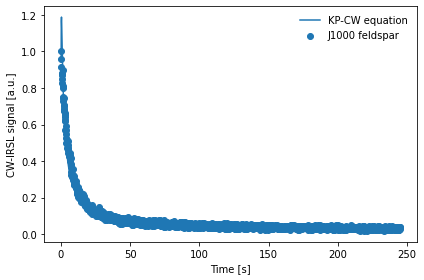

FOM= 11.5  %


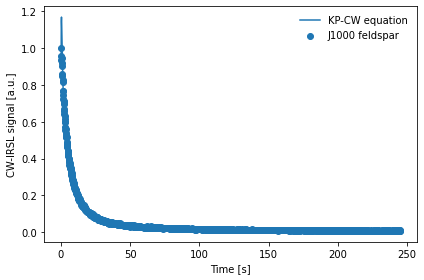

FOM= 13.37  %


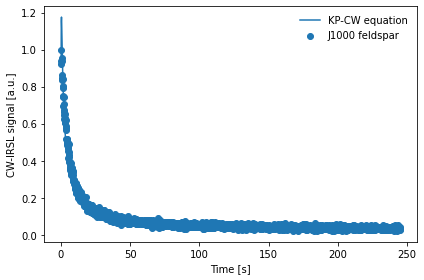

FOM= 33.42  %


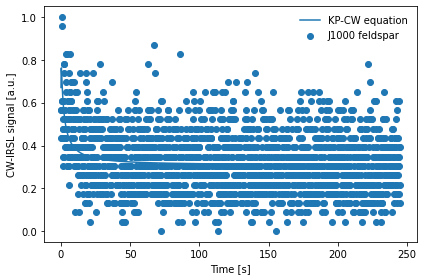

FOM= 17.81  %


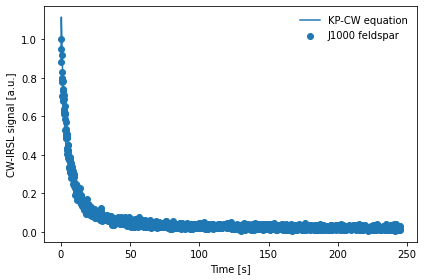

0.06967010309278351 +- 0.0881679187101527
1403.340206185567 +- 2032.614602272933


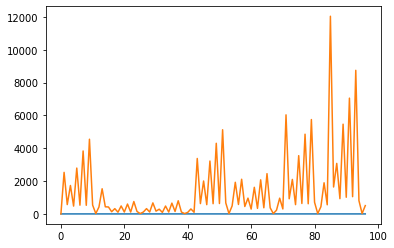

In [26]:
# Tunisia CW-IRSL 290oC  data fitted with KP-CW equation
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/IR290LandTallpos.TXT'
df =pd.read_table(url,delimiter='\t')
imaxs, dimaxs, bgds ,dbgds =[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1]
 
for i in range(1,df.shape[1],1):
    x_data,y_data = df.iloc[:, 0].to_numpy(), df.iloc[:, i].to_numpy()
    
    imaxs[i] = max(y_data)
    y_data=y_data/max(y_data)
    rho=0.0040
    A=16.8
    def test_func(x, imax_fit,bgd_fit):
        return imax_fit*np.exp (-rho*(np.log(1 + A*x))\
    	** 3.0)*(np.log(1+A*x)**2.0)/(1+x*A)+bgd_fit
    params, cov = optimize.curve_fit(test_func,\
    x_data, y_data,maxfev=10000)
    #drho= round(np.sqrt(cov[1][1]),5)
    #dA = round(np.sqrt(cov[2][2]),2)
    #dimax = round(np.sqrt(cov[0][2]),2)
    plt.scatter(x_data, y_data, label='J1000 feldspar')
    plt.plot(x_data, test_func(x_data, *params[0:4]),
    label='KP-CW equation')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.ylabel('CW-IRSL signal [a.u.]')
    plt.xlabel('Time [s]')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.tight_layout()
    imax, bgd=int(params[0]),round(params[-1],3)
    res=test_func(x_data, *params)-y_data
    FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
    #myTable=PrettyTable(["A",'dA', "rho",  "d(rho)",\
    #"s'(s^-1)","ds'",'bgd'])  
    #myTable.add_row([imax,dimax,rho,drho, A, dA,bgd])
    print('FOM=',FOM,' %')
    #print(myTable)
    plt.show()
    #print(dA)
    bgds[i]= bgd 
    #drhos[i] = drho 
    #dAs[i] =  dA


print(np.mean(bgds),'+-',np.std(bgds))
plt.plot(range(len(bgds)),bgds)
#plt.ylim(5,20)


print(np.mean(imaxs),'+-',np.std(imaxs))
plt.plot(range(len(imaxs)),imaxs)

A= 11.014 +- 1.541
N= 90


<ErrorbarContainer object of 3 artists>

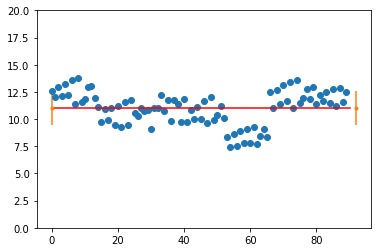

In [21]:


new_As = [item for item in As if item >= 7] 
new_As = [item for item in new_As if item <= 22] 
plt.plot(range(len(new_As)),new_As,'o')
plt.ylim(0,20)
print('A=',round(np.mean(new_As),3),'+-',round(np.std(new_As),3))
print('N=',len(new_As))

point1 = [0,np.mean(new_As)]
point2 = [90,np.mean(new_As)]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]] 
plt. plot(x_values, y_values,'r-')

plt.errorbar([0,92],[np.mean(new_As),np.mean(new_As)],
             yerr=[np.std(new_As),np.std(new_As)],fmt='.')

(0.0, 20.0)

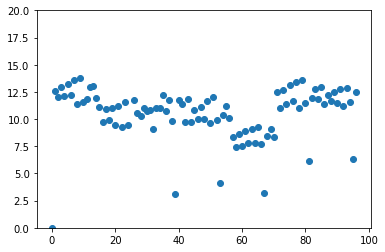

In [11]:

plt.plot(range(len(As)),As,'o')
plt.ylim(0,20)